In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
from google.colab import files
uploaded = files.upload()




Saving Housing.csv to Housing.csv


In [6]:
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [11]:
X = df.drop("price", axis=1)
y = df["price"]

In [12]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)


In [13]:
X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42
)


In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)   # output layer for regression
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [16]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 25279854542848.0000 - mae: 4730687.0000 - val_loss: 26268988866560.0000 - val_mae: 4768817.0000
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25622715826176.0000 - mae: 4743295.5000 - val_loss: 26268980477952.0000 - val_mae: 4768816.0000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24647911342080.0000 - mae: 4674690.0000 - val_loss: 26268967895040.0000 - val_mae: 4768815.5000
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 29567351783424.0000 - mae: 5062731.5000 - val_loss: 26268955312128.0000 - val_mae: 4768814.0000
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25057036337152.0000 - mae: 4702662.0000 - val_loss: 26268934340608.0000 - val_mae: 4768812.0000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26966323363840.0000 - mae: 4827783.0000 - val_loss: 26268904980480.0000 - val_mae: 4768809.0000
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2749

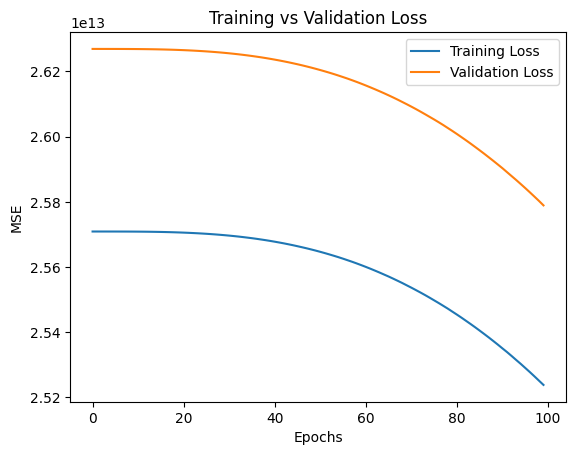

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [18]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE:", test_mae)
print("Test MSE:", test_loss)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 26872484200448.0000 - mae: 4698635.0000
Test MAE: 4727602.5
Test MSE: 26627400531968.0


In [19]:
y_pred = model.predict(X_test)
y_pred[:10]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[59538.816],
       [57242.406],
       [36678.547],
       [45500.215],
       [40356.887],
       [45727.86 ],
       [54644.688],
       [54923.004],
       [36379.48 ],
       [37259.215]], dtype=float32)

In [22]:
new_house = pd.DataFrame({
    'area': [3000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['yes'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [1],
    'prefarea': ['no'],
    'furnishingstatus': ['semi-furnished']
})


In [23]:
new_processed = preprocessor.transform(new_house)


In [24]:
pred_price = model.predict(new_processed)
pred_price


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[50725.477]], dtype=float32)